# **EMPLOYEE TURNOVER ANALYSIS PROJECT**

1- **Using Python’s Scikit-Learn library and following classifications:**
* Logistic Regression
* Random Forest
* Support Vector Machine

2- **EDA, Feature Selection**

3- **Measuring models' performance**

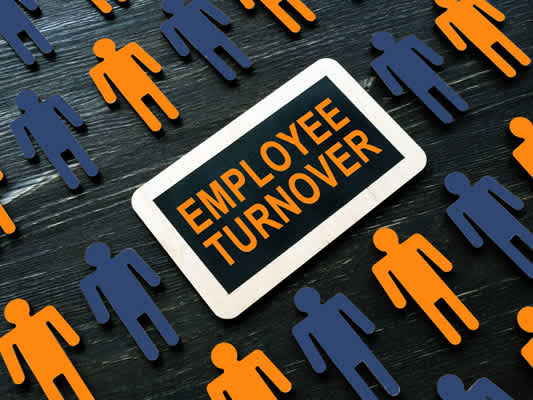

#**Data Preprocessing**

*Dataset represents 14999 (rows) employees'information, with 10 columns containing attributes of:*
* satisfaction_level (0–1)
* last_evaluation (Time since last evaluation in years)
* number_projects (Number of projects completed while at work)
* average_monthly_hours (Average monthly hours at workplace)
* time_spend_company (Time spent at the company in years)
* Work_accident (Whether the employee had a workplace accident)
* left (Whether the employee left the workplace or not (1 or 0)) - **Label**
* promotion_last_5years (Whether the employee was promoted in the last five years) (1 or 0)
* sales (Department in which they work for) - **To Rename**
* salary (Relative level of salary)

In [49]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
# Load the data
from google.colab import files
uploaded = files.upload() 

Saving employee.csv to employee (6).csv


In [51]:
# Store data in a Dataframe
df = pd.read_csv('employee.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Rename 'average_montly_hours', 'sales':

In [52]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

# Check how many data pts, rows/cols
df.shape

(14999, 10)

Check Missing values

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [54]:
df.isna().sum()
#df.isnull().values.any() #False

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#**Data Exploration**

In [55]:
# Data Statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Observations based on categorical variables:**  
* left
* department
* salary
* work accident
* promotion last 5 yrs

In [56]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Observation**
* avg satisfaction_level of those who stayed > that of those who left
* avg monthly_hours of those who left > that of those who stayed
* those got promoted in 5yrs less likely to leave
* 4yrs time might be a threshold for job exit 
* those with accidents more likely to stay

In [57]:
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


* Satisfaction level seems to balance above 50% across all dept., highest in Mgt level but lower in stressful dept of HR and Acc
* Work acc level highest in R&D team
* For the avg time working for company, Mgt level also has the longest duration 
* In promotion, Revenue's most directly involved dept. of Mgt, MKT, R&D & Sales have the leading indices.  
* HR is highest in turnover rate, while Mgt and R&D retention rate s better
* Product Mgt has none promotion in last 5 yrs

In [58]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [59]:
df.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years
Work_accident,,,,,,,
0,0.606833,0.716602,3.805456,201.258613,3.496960,0.265160,0.018940
1,0.648326,0.713144,3.788843,199.818349,3.505763,0.077916,0.035039


In [60]:
df.groupby('promotion_last_5years').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left
promotion_last_5years,,,,,,,
0,0.611895,0.716321,3.804155,201.076431,3.483719,0.142575,0.241962
1,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,0.059561


* Higher salary ~ higher satisfaction ~ higher working duration ~ higher promotion chance ~ Less likely to leave
* Those with work accident ~ higher satisfaction ?? ~higher promotion chance ~ Less likely to leave
* Those with promotion ~ higher satisfaction ~ higher working duration ~ prone to get accidents ?? ~ Less likely to leave

#**Data Visualization**

In [61]:
# Check unique values and counts of them

for x in df.columns:
  print(str(x) + ' : ') 
  print(df[x].value_counts())
  print('-------------------------------------------------------------')

satisfaction_level : 
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64
-------------------------------------------------------------
last_evaluation : 
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64
-------------------------------------------------------------
number_project : 
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
-------------------------------------------------------------
average_monthly_hours : 
156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_monthly_hours, Length: 215, dtype: int64
-------------------------------------------------------------
time_spend_company : 
3     6443
2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f635cdbbf50>,
      dtype=object)

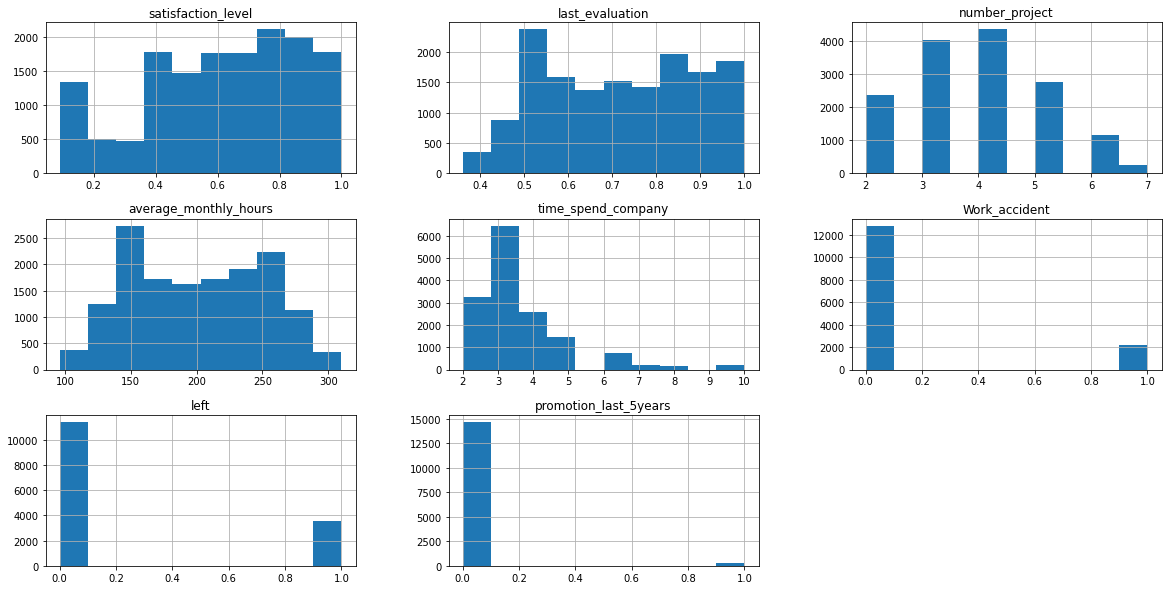

In [62]:
df.hist(figsize=(20,10))

In [63]:
#couldnt work out how to bin 'em up 
#sns.histplot(data=df_2, x="satisfaction_level", bins=10, hue = 'left',multiple="stack", shrink = .95)
#sns.histplot(data=df_2, x="satisfaction_level", bins=10, hue = 'left',multiple="dodge", shrink = .95)

In [64]:
# Create ranges for data visualization
df_1 = df.copy()

s = df_1['satisfaction_level']
df_1.loc[(s< 0.1) | (s==0.1), 'satisfaction_level'] = 0.1
df_1.loc[(s >0.1) & (s<0.2) | (s==0.2), 'satisfaction_level'] = 0.2
df_1.loc[(s >0.2) & (s<0.3) | (s==0.3), 'satisfaction_level'] = 0.3
df_1.loc[(s >0.3) & (s<0.4) | (s==0.4), 'satisfaction_level'] = 0.4
df_1.loc[(s >0.4) & (s<0.5) | (s==0.5), 'satisfaction_level'] = 0.5
df_1.loc[(s >0.5) & (s<0.6) | (s==0.6), 'satisfaction_level'] = 0.6
df_1.loc[(s >0.6) & (s<0.7) | (s==0.7), 'satisfaction_level'] = 0.7
df_1.loc[(s >0.7) & (s<0.8) | (s==0.8), 'satisfaction_level'] = 0.8
df_1.loc[(s >0.8) & (s<0.9) | (s==0.9), 'satisfaction_level'] = 0.9
df_1.loc[(s >0.9) & (s<1) | (s==1), 'satisfaction_level'] = 1
s.value_counts()

s_1 = df_1['last_evaluation']
df_1.loc[(s_1 < 0.4) & (s_1==0.4), 'last_evaluation'] = 0.4
df_1.loc[(s_1 >0.4) & (s_1<0.5) | (s_1==0.5), 'last_evaluation'] = 0.5
df_1.loc[(s_1 >0.5) & (s_1<0.6) | (s_1==0.6), 'last_evaluation'] = 0.6
df_1.loc[(s_1 >0.6) & (s_1<0.7) | (s_1==0.7), 'last_evaluation'] = 0.7
df_1.loc[(s_1 >0.7) & (s_1<0.8) | (s_1==0.8), 'last_evaluation'] = 0.8
df_1.loc[(s_1 >0.8) & (s_1<0.9) | (s_1==0.9), 'last_evaluation'] = 0.9
df_1.loc[(s_1 >0.9) & (s_1<1) | (s_1==1), 'last_evaluation'] = 1
s_1.value_counts()

s_2 = df_1['average_monthly_hours']
df_1.loc[(s_2 < 100) | (s_2==100), 'average_monthly_hours'] = 100
df_1.loc[(s_2 >100) & (s_2<150) | (s_2==150), 'average_monthly_hours'] = 150
df_1.loc[(s_2 >150) & (s_2<200) | (s_2==200), 'average_monthly_hours'] = 200
df_1.loc[(s_2 >200) & (s_2<250) | (s_2==250), 'average_monthly_hours'] = 250
df_1.loc[(s_2 >250) & (s_2<300) | (s_2==300), 'average_monthly_hours'] = 300
df_1.loc[(s_2 >300), 'average_monthly_hours'] = 310
s_2.value_counts()

200    4471
250    4273
300    3043
150    2980
310     159
100      73
Name: average_monthly_hours, dtype: int64

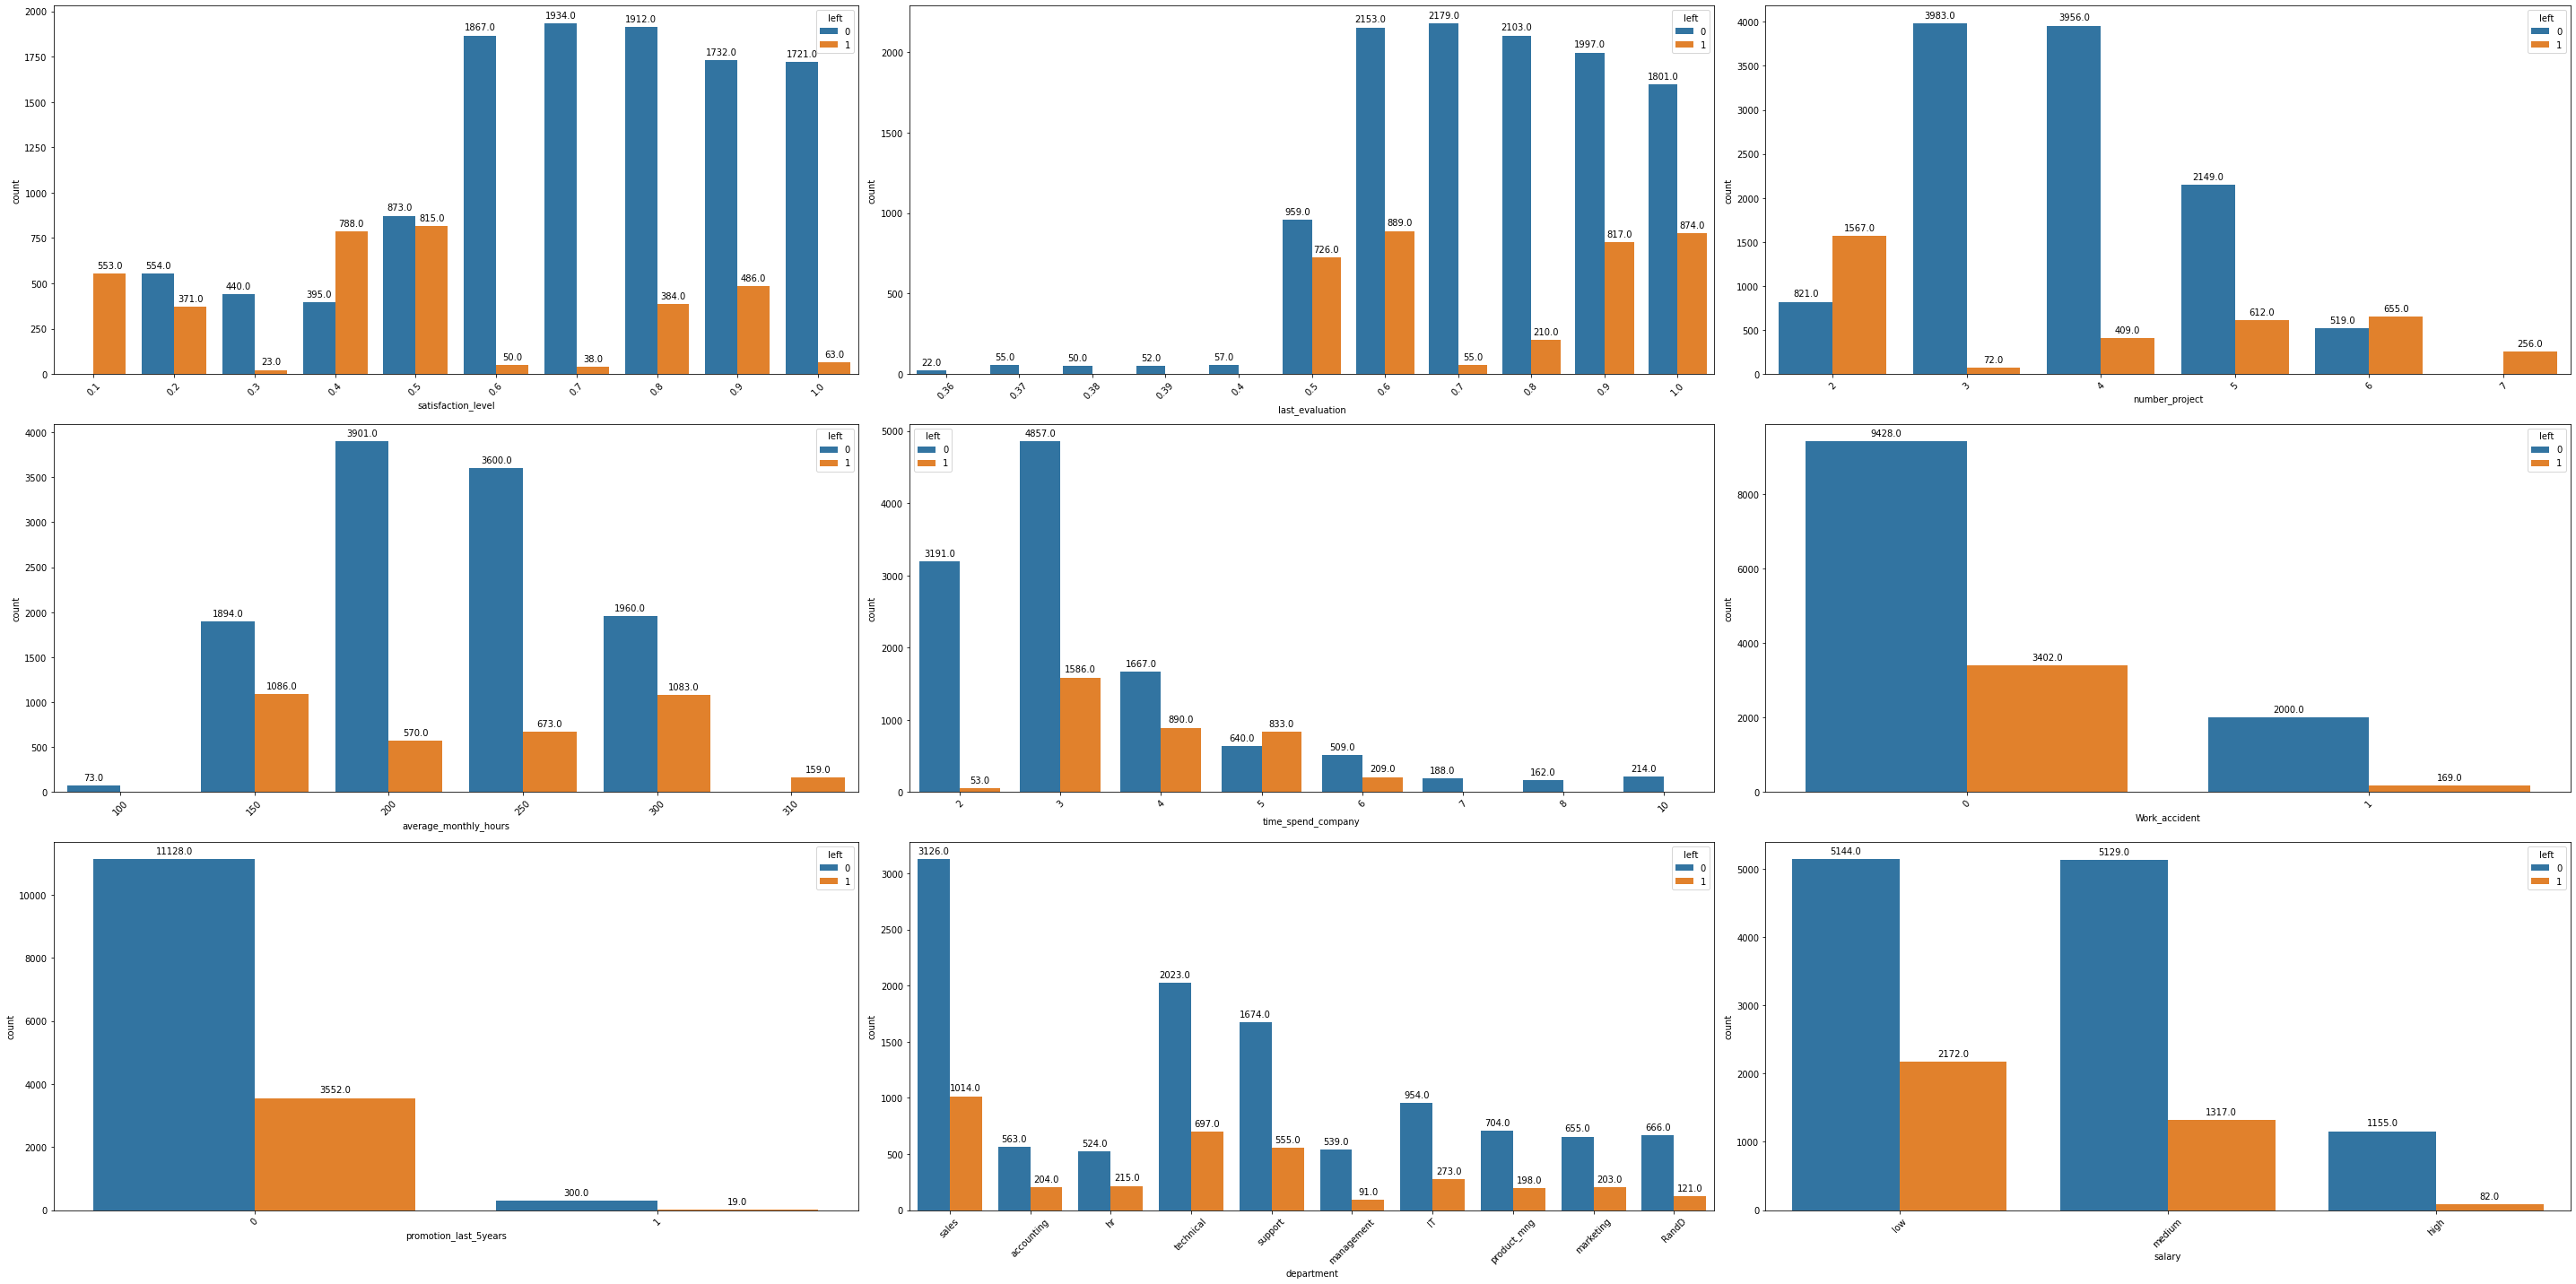

In [65]:
# Pairplot counts of left to each feature
a = ['satisfaction_level','last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']
       
fig, axes = plt.subplots(3, 3, sharey=False, figsize = (40,20))
       
sns.countplot(ax=axes[0, 0], x =a[0], hue = 'left', data = df_1)
sns.countplot(ax=axes[0, 1], x =a[1], hue = 'left', data = df_1)
sns.countplot(ax=axes[0, 2], x =a[2], hue = 'left', data = df)
sns.countplot(ax=axes[1, 0], x =a[3], hue = 'left', data = df_1)
sns.countplot(ax=axes[1, 1], x =a[4], hue = 'left', data = df)
sns.countplot(ax=axes[1, 2], x =a[5], hue = 'left', data = df)
sns.countplot(ax=axes[2, 0], x =a[6], hue = 'left', data = df)
sns.countplot(ax=axes[2, 1], x =a[7], hue = 'left', data = df)
sns.countplot(ax=axes[2, 2], x =a[8], hue = 'left', data = df)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.tight_layout()

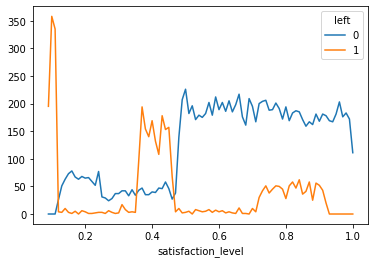

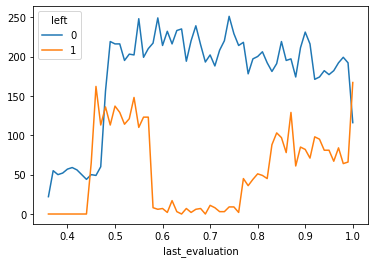

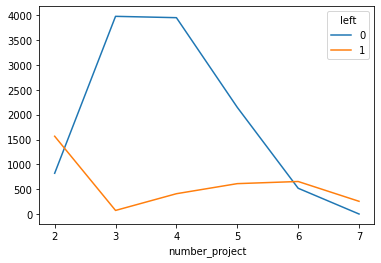

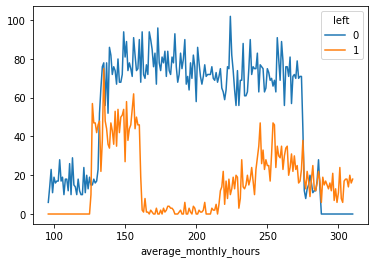

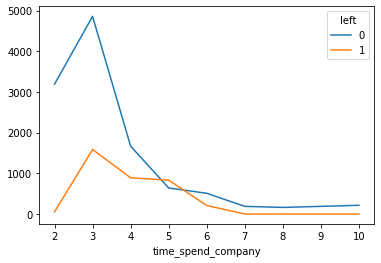

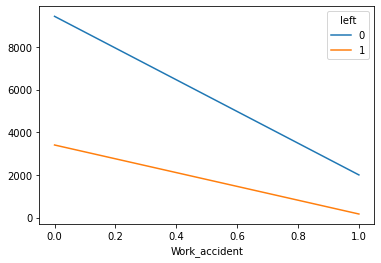

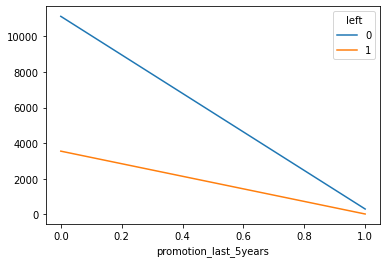

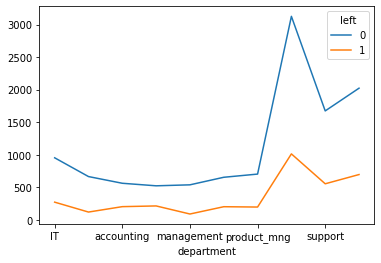

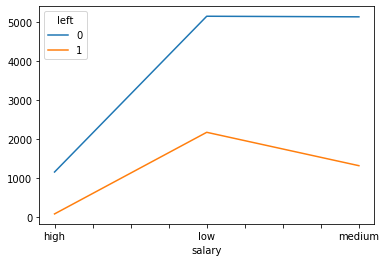

In [66]:
# Turnover trend line across features: 
for i in range(9):
  pd.crosstab(df[a[i]], df['left']).plot()

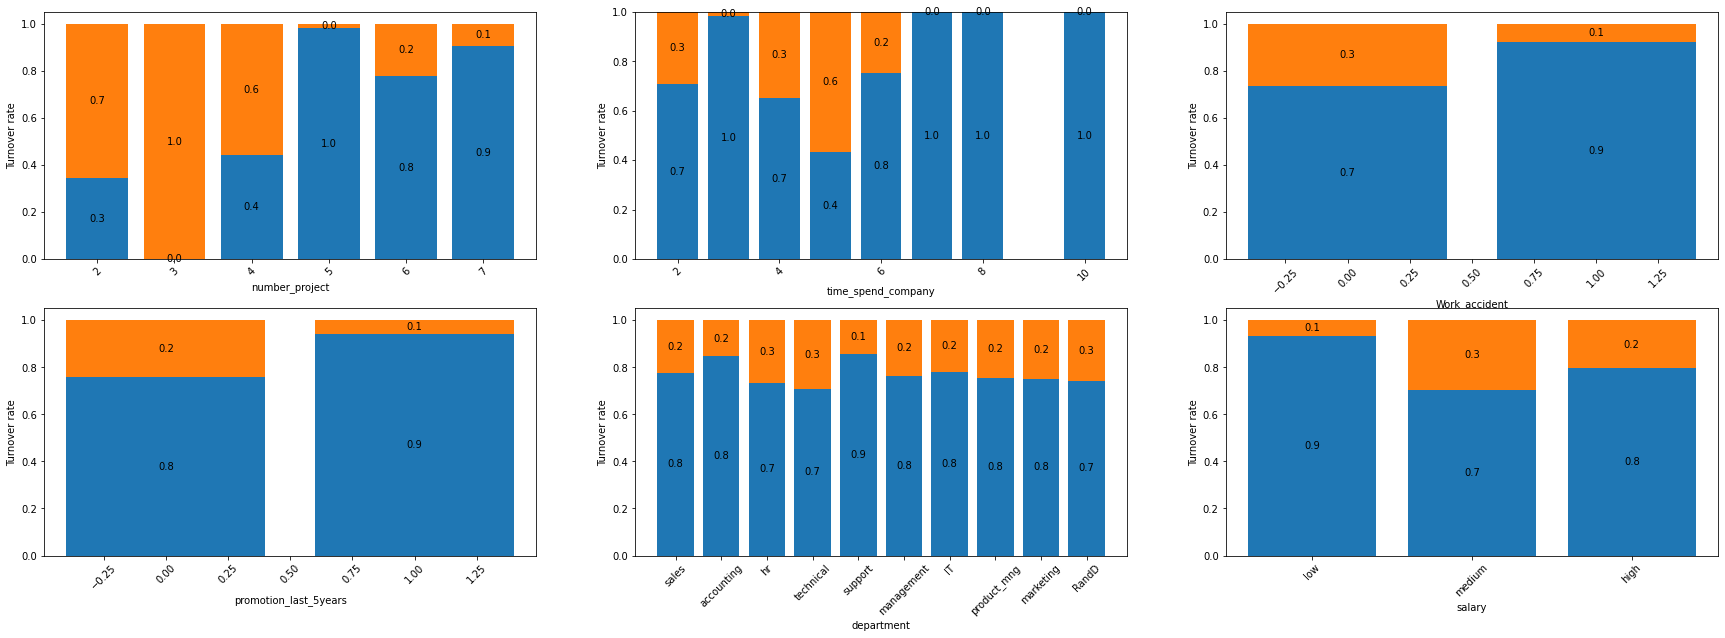

<Figure size 432x288 with 0 Axes>

In [67]:
# Visualization turnover rate across features

fig, axes = plt.subplots(2, 3, sharex=False, figsize = (30,10))

a = ['number_project', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']

for i,ax in zip(a, axes.flatten()):
    retention_rate  = pd.crosstab(df_1[i],df_1.left).div(pd.crosstab(df_1[i],df_1.left).sum(1).astype(float), axis=0)[0].to_list()
    turnover_rate  = pd.crosstab(df_1[i],df_1.left).div(pd.crosstab(df_1[i],df_1.left).sum(1).astype(float), axis=0)[1].to_list()
    ax.bar(df_1[i].unique(), retention_rate)
    ax.bar(df_1[i].unique(), turnover_rate, bottom = retention_rate)
    ax.set_xlabel(i) 
    ax.set_ylabel('Turnover rate') 

    plt.sca(ax)
    plt.xticks(rotation=45)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()
plt.tight_layout()

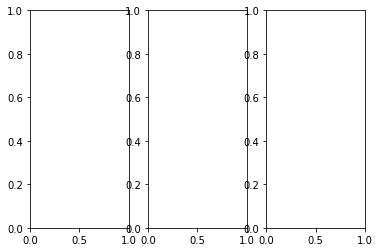

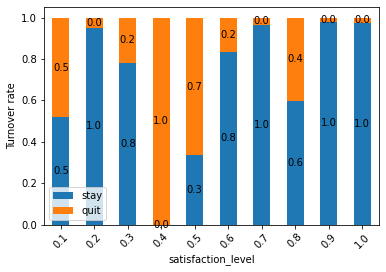

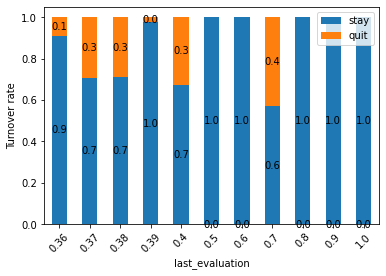

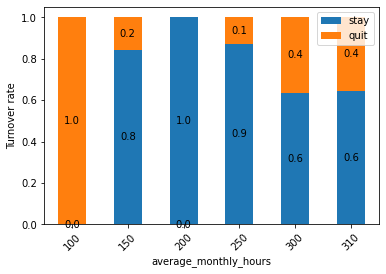

In [68]:
a = ['satisfaction_level','last_evaluation','average_monthly_hours']

fig, axes = plt.subplots(1, 3, sharex=False)

for i,ax in zip(a, axes.flatten()):
    retention_rate  = pd.crosstab(df_1[i],df_1.left).div(pd.crosstab(df_1[i],df_1.left).sum(1).astype(float), axis=0)[0].to_list()
    turnover_rate  = pd.crosstab(df_1[i],df_1.left).div(pd.crosstab(df_1[i],df_1.left).sum(1).astype(float), axis=0)[1].to_list()
    ax = pd.DataFrame({
      'feature': df_1[i].unique(),
      'stay': retention_rate,
      'quit': turnover_rate
    }).sort_values(by=['feature']).reset_index(drop=True).plot(x='feature', kind='bar', stacked=True)

    ax.set_xlabel(i) 
    ax.set_ylabel('Turnover rate') 

    plt.sca(ax)
    plt.xticks(rotation=45)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
plt.show()
# plt.tight_layout()

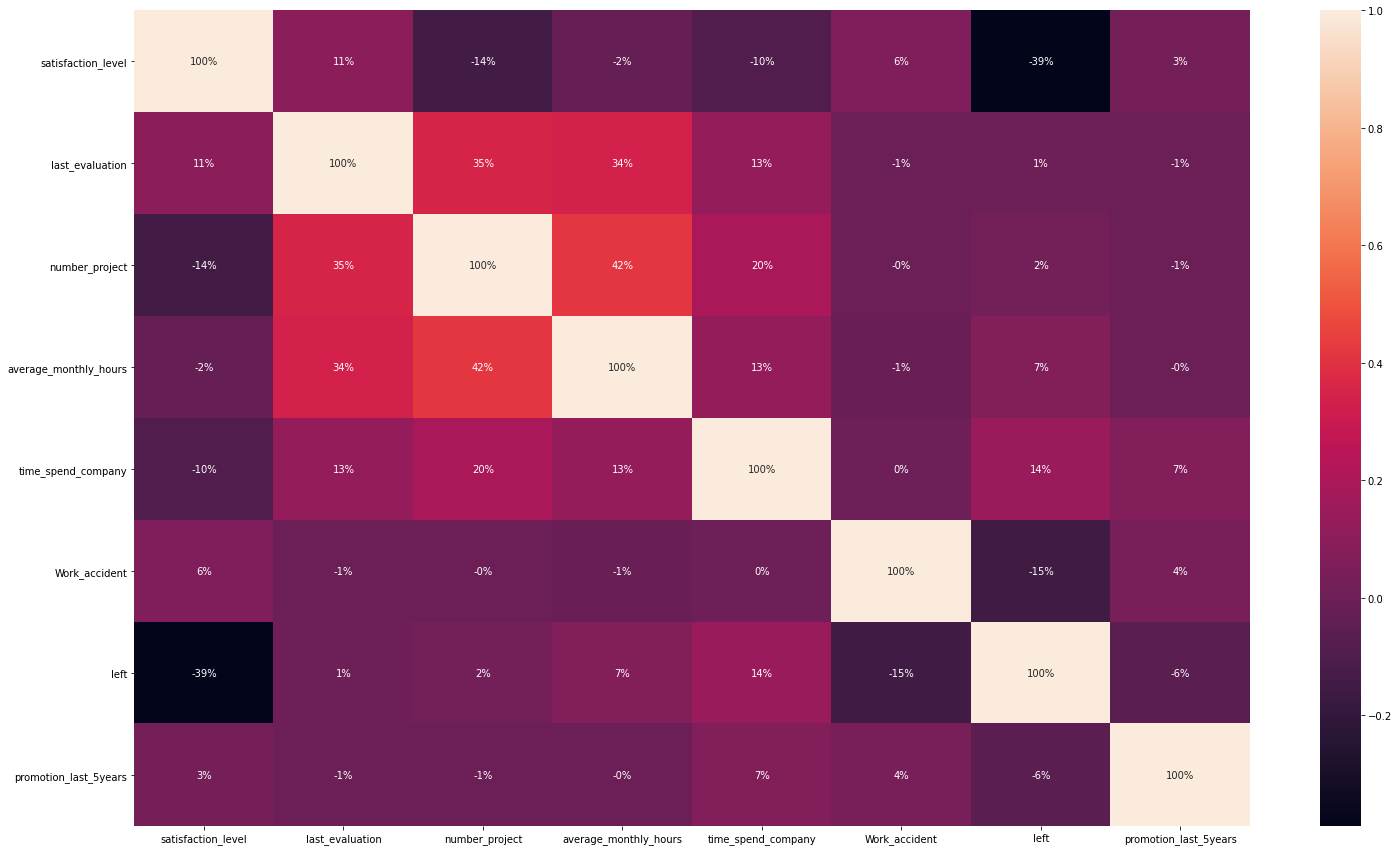

In [69]:
# Feature correlation
corr = df.corr() 

#visualize
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, fmt= '.0%')

# Encode Categorical Variables

In [70]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
# alphabetically
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df.salary = le.fit_transform(df.salary) 

salary_level = {'low':1, 'medium':2, 'high':3}
df.salary = df.salary.replace(salary_level)

In [71]:
df = pd.get_dummies(df, columns=['department'], drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [99]:
df_2 =df.copy()
df_2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

#Split data into Predictor Features X - outcome variable y & Scaling 

In [72]:
X = df.drop('left', axis=1)
y = df.left
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [73]:
# Feature scaling as linear models LR  benefits from StandardScaler()
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X,y)
X_scaled

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ]])

#Feature Selection
Lets try out a few feature selection techniques:
* R-style statistics P_value based   
* Recursive Feature Elimination (RFE) works by recursively removing variables and uses the model accuracy based on remained variables to identify significant variables
* Lasso regularization L1 shrinks some of the coefficients to zero to remove less important features
* Random forest Embedded function
* SelectKBest

1- **R-style statistics P_value based**

In [74]:
import statsmodels.formula.api as smf
glm = smf.logit(formula = 'left ~ satisfaction_level + last_evaluation + number_project + average_monthly_hours + time_spend_company + Work_accident + promotion_last_5years + salary + department_RandD + department_accounting + department_hr + department_management + department_marketing + department_product_mng + department_sales + department_support + department_technical', data = df).fit()
print(glm.summary())

Optimization terminated successfully.
         Current function value: 0.429709
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14981
Method:                           MLE   Df Model:                           17
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.2171
Time:                        16:37:35   Log-Likelihood:                -6445.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.0207      0.150      6.800      0.000       0.727      

* pseudo- r squared in range 0.2-0.4 is good
* Remove features with pvalue > significance level 0.05:
department_accounting, mkt, product_mgt, sales


In [75]:
select_feats_1 = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'department_RandD', 
       'department_hr', 'department_management',
       'department_support', 'department_technical']

2-**RFE**

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr, 10) # try selecting 10 features
rfe = rfe.fit(X_scaled, y)
print(rfe.support_)
print(rfe.ranking_)
select_feats_2 = X.columns[(rfe.get_support())]
select_feats_2

[ True  True  True  True  True  True  True  True  True False False  True
 False False False False False]
[1 1 1 1 1 1 1 1 1 6 2 1 7 8 5 4 3]


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_management'],
      dtype='object')

3-**Lasso regularization L1**

In [77]:
from sklearn.feature_selection import SelectFromModel
# set high C to increase the number of features removed 
L1_Reg = SelectFromModel(LogisticRegression(C=5, penalty='l1',solver='liblinear'))
L1_Reg = L1_Reg.fit(X_scaled, y)
print(L1_Reg.get_support())  #couldnt remove any feature

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


4-**Random Forest measure the level of feature impurity** 
* the more a feature decreases the impurity, the more important the feature is. 
* to give a better intuition, features at the top of the trees are more important than at the end nodes,as the top splits lead to bigger information gains.

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = SelectFromModel(RandomForestClassifier(n_estimators = 100)).fit(X, y)

This should render a bar graph like below where x-axis is the feature indexes and y axis is the feature importance. The features are sorted in the order of importance.

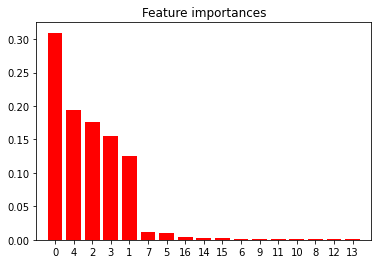

['satisfaction_level',
 'time_spend_company',
 'number_project',
 'average_monthly_hours',
 'last_evaluation',
 'salary',
 'Work_accident',
 'department_technical',
 'department_sales',
 'department_support']

In [79]:
importances = rf.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

select_feats_3 = [X.columns[i] for i in indices[:10]]
select_feats_3

5-**SelectKBest**

In [80]:
from sklearn.feature_selection import SelectKBest, chi2
kbest = SelectKBest(chi2, k=10).fit(X, y)
select_feats_4 = X.columns[(kbest.get_support())]

#Finalize 10 selected features

In [81]:
from collections import Counter
select_feats = Counter(list(select_feats_1)+list(select_feats_2)+list(select_feats_3)+list(select_feats_4)).most_common(10)
select_feats = [item[0] for item in select_feats]
select_feats

['satisfaction_level',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'salary',
 'last_evaluation',
 'number_project',
 'promotion_last_5years',
 'department_RandD',
 'department_management']

In [82]:
X_select = df[select_feats]
X_scaled = StandardScaler().fit_transform(X_select,y)

#Split Train Test

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Logistic Regression Model

In [84]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
lr = LogisticRegression().fit(X_train, y_train)
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test))))

Logistic regression accuracy: 0.794


#Random Forest

In [85]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train, y_train)
print('RF accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

RF accuracy: 0.991


#Support Vector Machine

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('SVC accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

SVC accuracy: 0.961


#So far LR lost to RF and SVC, Random forest has given its best power !
but we need to check if it falls into overfitting situation

#Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest model.

In [87]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=10)
results_1 = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
results_2 = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')
print("RF 10-fold cross validation average accuracy: %.3f" % (results_1.mean()))
print("SVC 10-fold cross validation average accuracy: %.3f" % (results_2.mean()))

RF 10-fold cross validation average accuracy: 0.988
SVC 10-fold cross validation average accuracy: 0.960


So the models r not overfitting

#Model Performance 

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def perform_measure(model, X_test, y_test ):
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_pred, y_test, [1,0])
  sns.heatmap(conf_matrix, annot=True, fmt='.0f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.title('model')
  plt.show()
  return classification_report(y_test, model.predict(X_test))

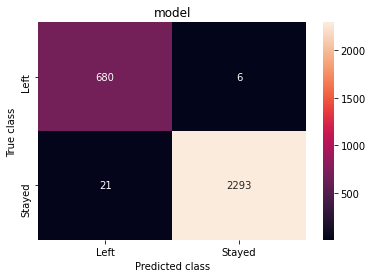

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.97      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [89]:
print(perform_measure(rf, X_test,y_test))

* Recall: number of correct 'left' prediction / "real left" (680/680+6)
* Precision: number of correct 'left' prediction / "predicted left" (680/680 +21)

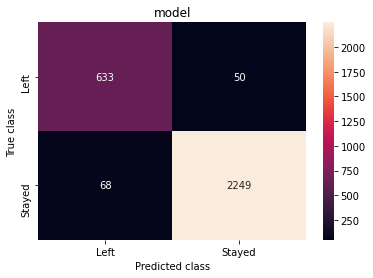

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2299
           1       0.93      0.90      0.91       701

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [90]:
print(perform_measure(svc, X_test,y_test))

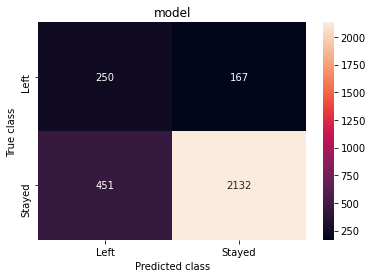

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2299
           1       0.60      0.36      0.45       701

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



In [91]:
print(perform_measure(lr, X_test,y_test))

#ROC curve

Receiver operating characteristic (ROC) curve:
* dotted diagonal line represents the ROC curve of a purely random classifier 
* Better classifier stays as far away from that line as possible toward the top-left corner of TPR

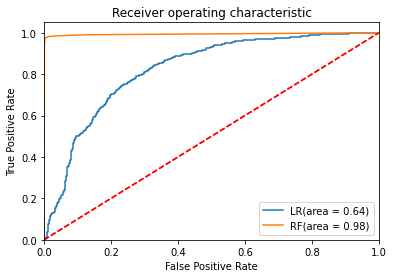

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

for model,label in zip([lr,rf],['LR','RF']): 
  roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

  plt.plot(fpr, tpr, label='%s(area = %0.2f)' % (label, roc_auc))
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
plt.show()

In [93]:
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {:.2f}%'.format(select_feats[index], (importance[index] *100.0)))

promotion_last_5years : 0.12%
department_management : 0.20%
department_RandD : 0.26%
Work_accident : 0.65%
salary : 1.34%
last_evaluation : 12.07%
time_spend_company : 15.70%
average_monthly_hours : 16.15%
number_project : 21.92%
satisfaction_level : 31.59%


#Predict on a real life case

In [94]:
example = [[0.1],[1],[10],[168],[10],[0],[1],[3],[0],[0]]
test = pd.DataFrame(example).T
test.columns =['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'department_RandD', 'department_management']
rf.predict(test)

array([0])